## KNN for 3 classes (apple, banana, watermelon)

- apple width ≈ 6cm
- apple length ≈ 6cm
- banana width ≈ 4cm
- banana length ≈ 8cm
- watermelon width ≈ 10cm
- watermelon length ≈ 30cm

apple:0 - banana:1 - watermelon:2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
apple_width = np.random.normal(6, 1, N)
apple_length = np.random.normal(6, 1, N)
banana_width = np.random.normal(4, 1, N)
banana_length = np.random.normal(8, 1, N)
watermelon_width = np.random.normal(10, 1, N)
watermelon_length = np.random.normal(30, 1, N)

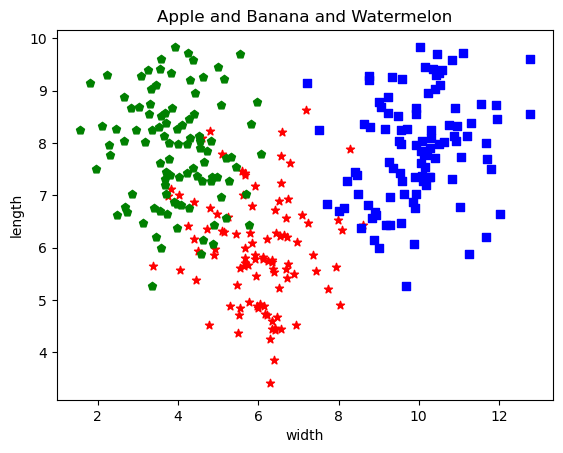

In [24]:
plt.scatter(apple_width, apple_length, c='red', marker='*')
plt.scatter(banana_width, banana_length, c='green', marker='p')
plt.scatter(watermelon_width, banana_length, c='blue', marker='s')
plt.title('Apple and Banana and Watermelon')
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [4]:
width = np.concatenate((apple_width, banana_width, watermelon_width))
length = np.concatenate((apple_length, banana_length, watermelon_length))
# width.shape

X_train = np.array([width, length]).T
#X_train.shape
X_train

array([[ 5.78745053,  6.27400921],
       [ 4.80334195,  6.74946981],
       [ 6.95705012,  6.10193923],
       [ 6.34039375,  4.44027628],
       [ 6.56111163,  4.45211627],
       [ 6.10977423,  5.82093993],
       [ 3.38394482,  5.64436722],
       [ 6.56722771,  7.23007428],
       [ 4.76486184,  4.51124176],
       [ 5.66117539,  5.79632566],
       [ 8.29531603,  7.88628204],
       [ 6.33226   ,  4.60066768],
       [ 5.91764769,  5.77700385],
       [ 5.95576217,  5.45555138],
       [ 6.50847251,  6.88887603],
       [ 6.30387486,  4.25605453],
       [ 6.29468505,  3.4135426 ],
       [ 5.46288708,  5.2884577 ],
       [ 6.38436883,  5.53356429],
       [ 4.23994781,  6.42259285],
       [ 4.80471542,  8.23345787],
       [ 6.75329316,  6.92408096],
       [ 7.93390129,  5.63598864],
       [ 5.14379855,  6.29314716],
       [ 8.09702799,  6.33366715],
       [ 5.61668843,  7.00883414],
       [ 3.82944286,  7.12956643],
       [ 3.75734151,  6.9829552 ],
       [ 8.59883704,

In [6]:
Y_apples = np.zeros(N, dtype='int')
Y_bananas = np.ones(N, dtype='int')
Y_watermelon = np.ones(N, dtype='int')*2
Y_train = np.concatenate((Y_apples, Y_bananas, Y_watermelon))
Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
def euclidean_distance(x1, x2):
    return  np.sqrt(np.sum((x1 - x2)**2))

In [14]:
new_fruit = np.array([11, 27])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)

distances

[21.37141469423699,
 21.177406455414744,
 21.285544106042476,
 23.035908156311837,
 22.980661233310784,
 21.73630358888222,
 22.673053340100733,
 20.260785600887328,
 23.337120540196725,
 21.86547172975973,
 19.304132447158235,
 22.88051321321517,
 21.823058227719365,
 22.127078472578187,
 20.60657969104783,
 23.223708724466565,
 24.0512153794094,
 22.406487641680535,
 21.957047008803038,
 21.659362651216018,
 19.762708682164348,
 20.52016189336496,
 21.582908580541417,
 21.519034601478552,
 20.869225187311255,
 20.703303018534154,
 21.124654318737143,
 21.287042644911246,
 20.70346006748533,
 22.677647747168447,
 21.54632313007842,
 20.292524642138183,
 20.869048459478044,
 22.834054360439225,
 21.186929082294736,
 20.749258828897304,
 20.875267694376504,
 19.829645180035882,
 21.67405693608258,
 21.573448393248512,
 21.896686541024334,
 21.742974643226827,
 21.470934213492534,
 21.832201289589054,
 21.232045685435583,
 21.44224678321357,
 21.77127009085435,
 23.027651057704087,
 22.6

In [15]:
k = 5
nearest_neighbors = np.argsort(distances)[0:k]
nearest_neighbors

array([283, 232, 209, 203, 270], dtype=int64)

In [16]:
Y_train[nearest_neighbors]

array([2, 2, 2, 2, 2])

In [17]:
result = np.bincount(Y_train[nearest_neighbors])

In [18]:
if np.argmax(result) == 0:
    print('New Fruit is Apple')
elif np.argmax(result) == 1:
    print('New Fruit is Banana')
else:
    print('New Fruit is Watermelon')

New Fruit is Watermelon
